In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt

import tensorflow.keras as keras
import tensorflow as tf

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

def preprocess_data(input_folder, output_folder, target_size=(64, 64), batch_size=32, augmentation_factor=5):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    image_generator = datagen.flow_from_directory(
        input_folder,
        target_size=target_size,
        batch_size=batch_size,
        class_mode=None,
        shuffle=False,
        save_to_dir=output_folder,
        save_prefix='augmented_',
        save_format='png'
    )
    for _ in range(augmentation_factor):
        image_generator.next()

input_folder = "/Users/maithilimahadik/Downloads/The IQ-OTHNCCD lung cancer dataset"
output_folder = "/Users/maithilimahadik/Desktop/preprocessed_data"
preprocess_data(input_folder, output_folder)


/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Found 1097 images belonging to 6 classes.


In [2]:
datagen = ImageDataGenerator()

In [3]:
class_names = ['Normal','Malignant','Bengin']

In [4]:
train_generator = datagen.flow_from_directory( 
    directory="/Users/maithilimahadik/Downloads/Data-2/train", 
    classes = class_names,
    target_size=(224,224),  
    batch_size=32,  
)

Found 148 images belonging to 3 classes.


In [5]:
valid_generator = datagen.flow_from_directory( 
    directory="/Users/maithilimahadik/Downloads/Data-2/valid", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="binary", 
)

Found 13 images belonging to 3 classes.


In [6]:
test_generator = datagen.flow_from_directory( 
    directory="/Users/maithilimahadik/Downloads/Data-2/test", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="binary", 
)

Found 54 images belonging to 3 classes.


In [7]:
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

In [8]:
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(5, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

In [9]:
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

In [10]:
# launch the training
model_history = trainModel(model = model, epochs = 10,optimizer="Adam")

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/var/folders/jb/tlmpnrqn4g76btg6p2zh6p8c0000gn/T/ipykernel_17784/403433898.py", line 2, in <module>

  File "/var/folders/jb/tlmpnrqn4g76btg6p2zh6p8c0000gn/T/ipykernel_17784/1563365056.py", line 4, in trainModel

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/keras/src/losses.py", line 143, in __call__

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/keras/src/losses.py", line 270, in call

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/Users/maithilimahadik/anaconda3/lib/python3.11/site-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy

logits and labels must have the same first dimension, got logits shape [32,5] and labels shape [96]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_9332]

In [ ]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()


In [11]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

2/2 [==============================] - 4s 1s/step - loss: 0.9642 - accuracy: 1.0000
The test loss is:  0.9641600847244263
The best accuracy is:  100.0


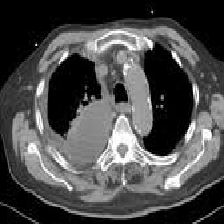

In [12]:
img = tf.keras.preprocessing.image.load_img('/Users/maithilimahadik/Downloads/Data-2/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/l6.png', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [13]:
predictions = model.predict(img_array)
print(predictions)

1/1 [==============================] - 1s 706ms/step
[[0.44148728 0.20424262 0.15417053 0.09319935 0.10690021]]


In [14]:
class_id = np.argmax(predictions, axis = 1)
print(class_id)

[0]


In [15]:
class_names[class_id.item()]

'Normal'